# Stationarity

In this activity, you will stationarize a non-stationary time series. The dataset is a time series of Shopify stock prices in CAD, from early 2017 through late 2019.

In [31]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Read CSV, parse dates, and set index
shopify_df = pd.read_csv((r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 10\2\02-Stu_Stationarity\Resources\shopify.csv'), 
                         parse_dates=True, 
                         index_col='Date')

# Display top rows
shopify_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03 16:00:00,58.22,58.40,56.60,57.65,83632
2017-01-04 16:00:00,57.96,59.02,57.15,58.86,84716
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175


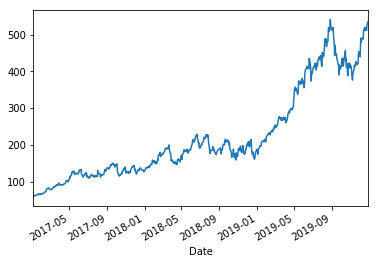

In [33]:
# Plot closing price
shopify_df.Close.plot()

# Test stationarity with the Augmented Dickey-Fuller test 

In [34]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(shopify_df.Close)

(0.5441995601733082,
 0.9861563642337198,
 11,
 738,
 {'1%': -3.4392418578608983,
  '5%': -2.86546426916434,
  '10%': -2.568859710342903},
 5005.111139326224)

# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [35]:
# Convert to stationary data by taking the `pct_change` of the Closing prices.
shopify_df["stationary_close"] = shopify_df.Close.pct_change()

shopify_df.head()

,Open,High,Low,Close,Volume,stationary_close
Date,,,,,,
2017-01-03 16:00:00,58.22,58.40,56.60,57.65,83632,NaN
2017-01-04 16:00:00,57.96,59.02,57.15,58.86,84716,0.020989
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222


In [36]:
# Drop the NaNs created by the pct_change function
shopify_df = shopify_df.dropna()

shopify_df.head()

,Open,High,Low,Close,Volume,stationary_close
Date,,,,,,
2017-01-04 16:00:00,57.96,59.02,57.15,58.86,84716,0.020989
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792


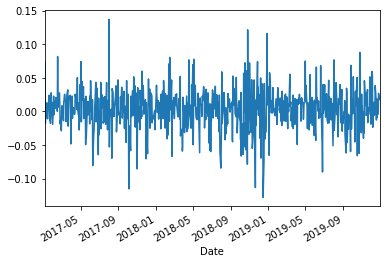

In [37]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
shopify_df.stationary_close.plot()

### Technique 2: Applying a Diff

In [38]:
# Subtract the upward trend for the closing prices using the `diff()` function
shopify_df["Diff"] = shopify_df.Close.diff()
shopify_df.head()

,Open,High,Low,Close,Volume,stationary_close,Diff
Date,,,,,,,
2017-01-04 16:00:00,57.96,59.02,57.15,58.86,84716,0.020989,NaN
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055,4.30
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80


In [39]:
# Drop the NaNs created from the diff function
shopify_df = shopify_df.dropna()

shopify_df.head()

,Open,High,Low,Close,Volume,stationary_close,Diff
Date,,,,,,,
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055,4.30
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40


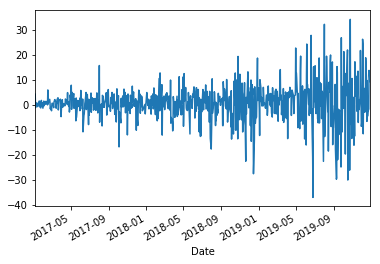

In [14]:
# Plot the differences
shopify_df.Diff.plot()

## BONUS 

### Technique 3: Apply Log Diff

In [15]:
# Replace positive/negative inf and drop NaNs
shopify_df2 = shopify_df[shopify_df['Diff'] != 0]
shopify_df2.head()

,Open,High,Low,Close,Volume,stationary_close,Diff
Date,,,,,,,
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055,4.30
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40


In [18]:
shopify_df2 = shopify_df2.replace(np.inf, np.nan).replace(-np.inf, np.nan)
shopify_df2 = shopify_df2.dropna()
shopify_df2.head()

,Open,High,Low,Close,Volume,stationary_close,Diff
Date,,,,,,,
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055,4.30
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40


In [20]:
# Calculate log of diff and plot
shopify_df2["log_close"] = np.log(shopify_df2["Close"]).diff()
shopify_df2.head()

,Open,High,Low,Close,Volume,stationary_close,Diff,log_close
Date,,,,,,,,
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055,4.30,NaN
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13,-0.018053
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51,0.008188
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80,0.012711
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40,0.006295


In [22]:
shopify_df2 = shopify_df2.dropna()
shopify_df2.head()

,Open,High,Low,Close,Volume,stationary_close,Diff,log_close
Date,,,,,,,,
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13,-0.018053
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51,0.008188
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80,0.012711
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40,0.006295
2017-01-12 16:00:00,64.00,64.00,62.56,63.83,79687,0.001412,0.09,0.001411


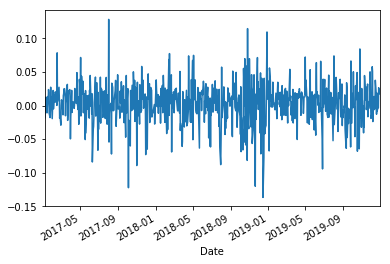

In [23]:
shopify_df2.log_close.plot()

In [25]:
shopify_df3 = shopify_df[shopify_df['Diff'] != 0]
shopify_df3 = shopify_df3.replace(np.inf, np.nan).replace(-np.inf, np.nan)
shopify_df3 = shopify_df3.dropna()

In [28]:
shopify_df3["log_close2"] = np.log(shopify_df3["Close"] / shopify_df3['Close'].shift(1))

shopify_df3 = shopify_df3.dropna()

shopify_df3.head()

,Open,High,Low,Close,Volume,stationary_close,Diff,log_close,log_close2
Date,,,,,,,,,
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13,-0.018053,-0.018053
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51,0.008188,0.008188
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80,0.012711,0.012711
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40,0.006295,0.006295
2017-01-12 16:00:00,64.00,64.00,62.56,63.83,79687,0.001412,0.09,0.001411,0.001411


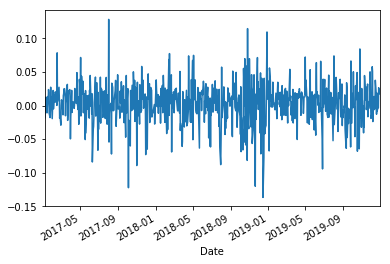

In [29]:
shopify_df3.log_close2.plot()

In [40]:
# Calculate log of diff and plot
shopify_df4 = shopify_df[shopify_df['Diff'] != 0]
shopify_df4 = shopify_df4.replace(np.inf, np.nan).replace(-np.inf, np.nan)
shopify_df4 = shopify_df4.dropna()
shopify_df4.head()

,Open,High,Low,Close,Volume,stationary_close,Diff
Date,,,,,,,
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055,4.30
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40


In [44]:
shopify_df4["log_of_diff"] = np.log(shopify_df4.Diff)

shopify_df4 = shopify_df4.dropna()

shopify_df4.head()

,Open,High,Low,Close,Volume,stationary_close,Diff,log_of_diff
Date,,,,,,,,
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80,-0.223144
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40,-0.916291
2017-01-12 16:00:00,64.00,64.00,62.56,63.83,79687,0.001412,0.09,-2.407946
2017-01-17 16:00:00,64.37,64.97,63.00,64.61,144473,0.009531,0.61,-0.494296
2017-01-18 16:00:00,64.99,66.31,64.22,66.17,155674,0.024145,1.56,0.444686


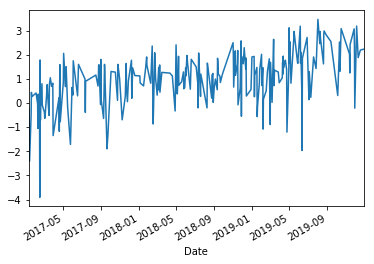

In [45]:
shopify_df4.log_of_diff.plot()